In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [27]:
def logistic(x, x0, k):
    return 1/(1+np.e**(-k*(x-x0)))

In [210]:
logistic(40000000,2000,0.001)

1.0

In [149]:
1/80

0.0125

In [224]:
#y_start = 10
#x_start = 400

y_start = 400
x_start = 21


XX_litter = 10
XY_litter = 4
YY_litter = 0.1

mortality_rate_factor = 1/80

post_partum_time =  4
gestation_time = 16



In [225]:
def adj_mortality_rate(mortality_rate_factor, pop_size):
    mortality_rate = logistic(pop_size,2000,0.005)#mortality_rate_factor * pop_size / 100
    return mortality_rate

In [226]:
logistic(400,2000,0.005)

0.00033535013046647827

In [227]:
t_max = 1200

total_x = np.zeros(t_max)
total_y = np.zeros(t_max)

y = np.ones(1) * y_start
x = np.ones(post_partum_time) * (x_start//(post_partum_time+gestation_time))
xx = np.ones(gestation_time) * (x_start//(post_partum_time+gestation_time))
xy = np.zeros(gestation_time)

#mortality_rate = mortality_rate_factor
mortality_rate = adj_mortality_rate(mortality_rate_factor, y_start + x_start)

for t in range(t_max):
    '''
    for i in range(4):
        try:
            [y,x,xx,xy][i] = np.random.binomial([y,x,xx,xy][i], 1-mortality_rate)
        except:
            np.round([y,x,xx,xy][i] * (1-mortality_rate))
    ''' 
           
    '''    if np.random.binomial(y[0], 1-mortality_rate) > 0:
        y[0] = np.random.binomial(y[0], 1-mortality_rate)
    else:
        y[0] = np.round(y[0]*(1-mortality_rate))'''
    y[0] = np.round(y[0]*(1-mortality_rate))
    x = np.round(x*(1-mortality_rate))
    xx = np.round(xx*(1-mortality_rate))
    xy = np.round(xy*(1-mortality_rate))
    '''
    try:
        x = np.random.binomial(x, 1-mortality_rate)
    except:
        x = np.round(x*(1-mortality_rate))
    try:
        xx = np.random.binomial(xx, 1-mortality_rate)
    except:
        xx = np.round(xx*(1-mortality_rate))
    try:
        xy = np.random.binomial(xy, 1-mortality_rate)
    except:
        xy = np.round(xy*(1-mortality_rate))
    
    '''
            
    yratio = np.max((0 ,y[0] / (y[0]+x[0])))
    
    total_x[t] = sum(x) + sum(xx) + sum(xy)
    total_y[t] = sum(y)
    
    #mortality_rate = mortality_rate_factor
    mortality_rate = adj_mortality_rate(mortality_rate_factor, total_x[t] + total_y[t])
    
    xy_pairings = np.round(x[0] * yratio)  
    new_xy = xy_pairings // 2
    new_xx = (x[0] - xy_pairings) // 2 + (xy_pairings - new_xy)
    new_y = np.random.binomial((y[0] - xy_pairings) // 2, YY_litter) + xy[0] * XY_litter 
    new_x = xx[0] * XX_litter + xx[0] + xy[0] # newborn + delivering mothers
    
    #for i in [x,xx,xy]:
    #    i = np.roll(i, -1)
    x = np.roll(x,-1)
    xx = np.roll(xx,-1)
    xy = np.roll(xy,-1)
    x[-1] = new_x
    xx[-1] = new_xx
    xy[-1] = new_xy
    
    y[0] = y[0] + new_y
    
    


    
    """
    print(t)
    print("x ",x)
    print("xx",xx)
    print("xy",xy)
    print("y ",y)
    print(10*"-")
    """

In [228]:
adj_mortality_rate(mortality_rate_factor, y_start + x_start)

0.0003724631197229686

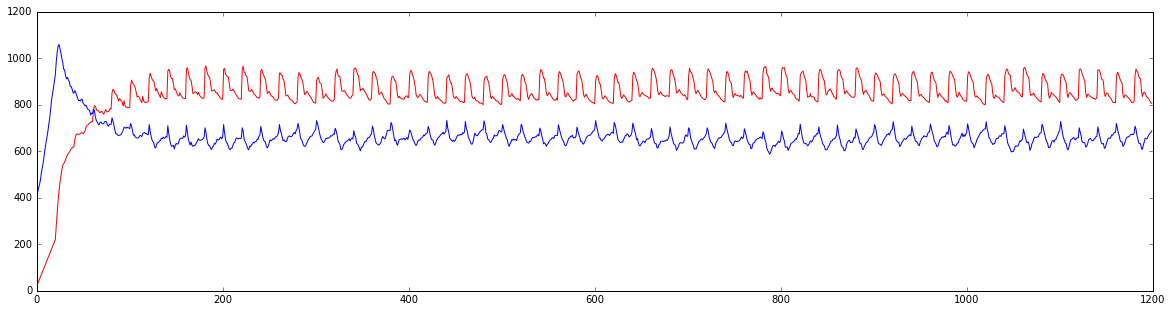

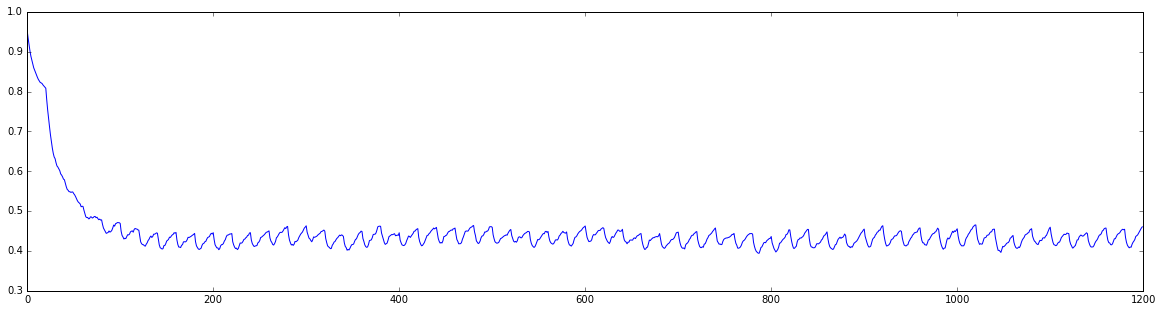

In [229]:
pi = [0,t_max] # print interval

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_x[pi[0]:pi[1]], c='r')
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]], c='b')
plt.show()

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]]/(total_x[pi[0]:pi[1]]+total_y[pi[0]:pi[1]]), c='b')
plt.show()

In [230]:
total_y[-1]+total_x[-1]

1494.0

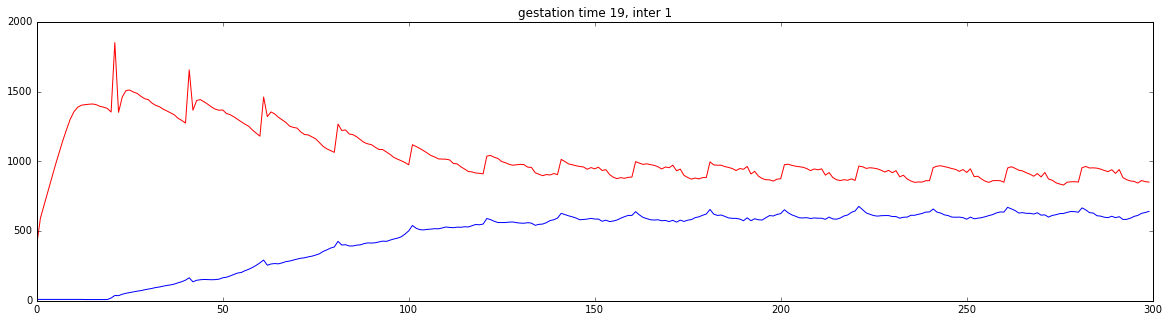

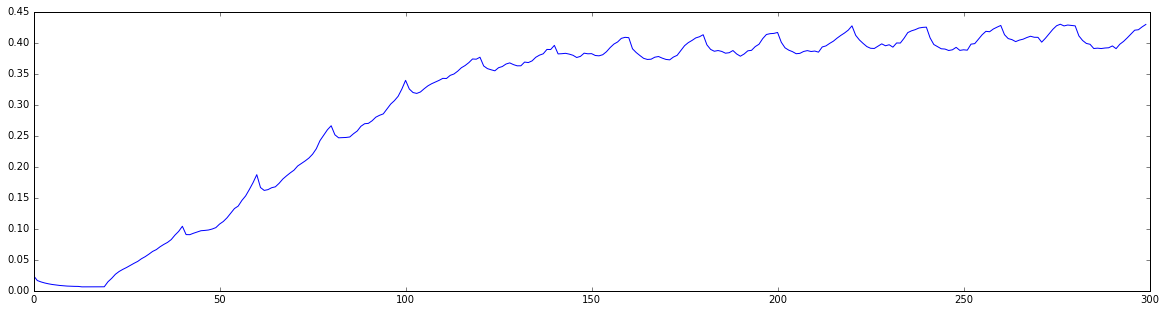

In [131]:
pi = [0,300] # print interval

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_x[pi[0]:pi[1]], c='r')
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]], c='b')
plt.title("gestation time 19, inter 1")
plt.show()

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]]/(total_x[pi[0]:pi[1]]+total_y[pi[0]:pi[1]]), c='b')
plt.show()

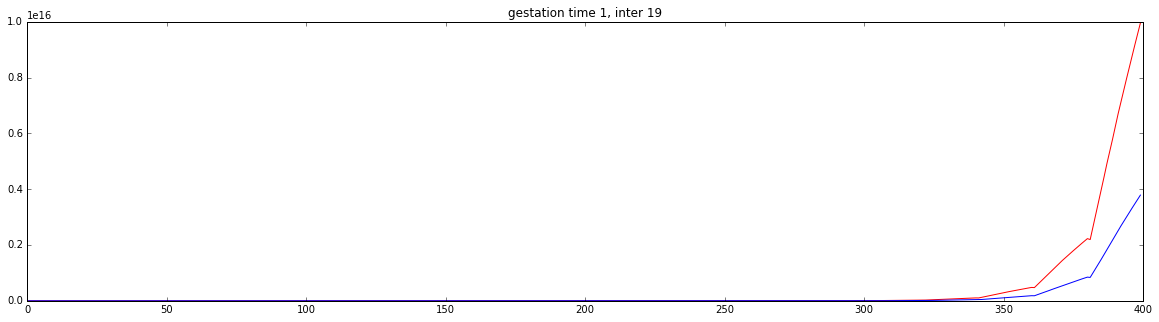

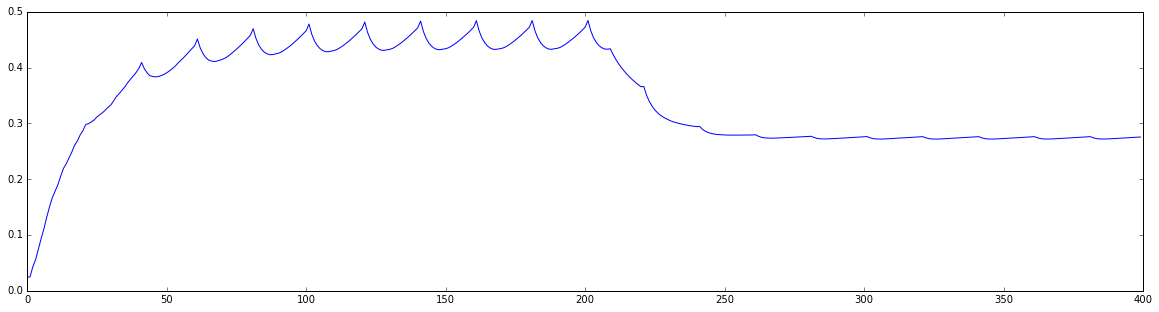

In [77]:
pi = [0,400] # print interval

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_x[pi[0]:pi[1]], c='r')
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]], c='b')
plt.title("gestation time 1, inter 19")
plt.show()

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]]/(total_x[pi[0]:pi[1]]+total_y[pi[0]:pi[1]]), c='b')
plt.show()

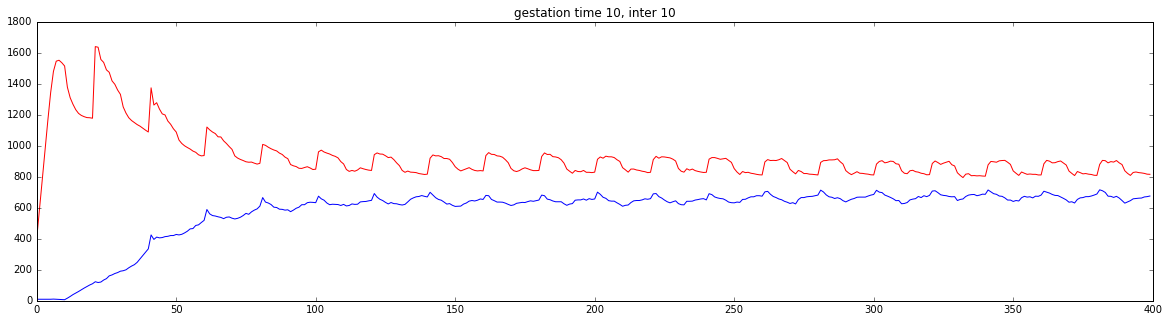

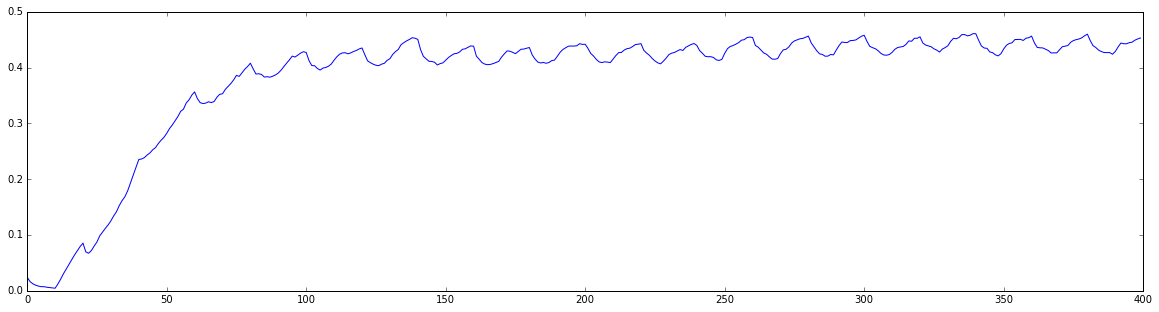

In [108]:
pi = [0,400] # print interval

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_x[pi[0]:pi[1]], c='r')
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]], c='b')
plt.title("gestation time 10, inter 10")
plt.show()

plt.figure(figsize = [20,5])
plt.plot(np.arange(t_max)[pi[0]:pi[1]], total_y[pi[0]:pi[1]]/(total_x[pi[0]:pi[1]]+total_y[pi[0]:pi[1]]), c='b')
plt.show()

In [9]:
for i in [x,xx,xy]:
    print(i)
    i = np.roll(i, -1)
    print(i)

[  1.89246139e+55]
[  1.89246139e+55]
[ 0.]
[ 0.]
[-0.]
[-0.]


In [10]:
np.roll(np.arange(10), -1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [11]:
np.array([900,100,325,12]) * (1-mortality_rate)

array([ 891.  ,   99.  ,  321.75,   11.88])

array([ 899.,  100.,  325.,   12.])

In [30]:
y = 15
x = 162

yratio = (y/ (x+y))

In [31]:
yratio

0.0847457627118644

In [35]:
print(np.round(x*yratio))
print(np.round(x*(1-yratio)))


14.0
148.0


In [273]:
total_x[-1]

4.0047810104668784e+75

In [39]:
11//2

5

In [51]:
for i in range(1,200,10):
    print(i, np.round((i/(101+i))*101))
    print(i, np.round((i/(101+i))*101))

1 1.0
11 10.0
21 17.0
31 24.0
41 29.0
51 34.0
61 38.0
71 42.0
81 45.0
91 48.0
101 50.0
111 53.0
121 55.0
131 57.0
141 59.0
151 61.0
161 62.0
171 63.0
181 65.0
191 66.0


In [50]:
100-10

90

In [57]:
np.round(6/5)
np.round(3/8)

0.0

In [64]:
5//2

2

1

In [75]:
binomial(10,0.)

NameError: name 'binomial' is not defined